# Part 4: Basic Machine Learning Models
<b>Author</b>: Sterling Cutler
<br>
<b>Date</b>: March 23, 2018

## Machine Learning
Talk about ML basics: train/test, CV, why insurance don't like it for lack of interpretability

In [18]:
# Load dataset
df <- read.csv("ABI_data.csv")

# Split dataset into training and test sets
train_ind <- sample(nrow(df), size=round(nrow(df)*0.8), replace=FALSE)
x_train <- data.matrix(df[train_ind, 1:6])
x_test <- data.matrix(df[-train_ind, 1:6])
y_train <- df[train_ind, 7]
y_test <- df[-train_ind, 7]

# Print data shapes
cat('Train Data Shape:', dim(x_train), "\n")
cat('Test Data Shape:', dim(x_test))

Train Data Shape: 1071 6 
Test Data Shape: 268 6

## Lasso, Ridge, and ElasticNet Models
Doc: https://cran.r-project.org/web/packages/glmnet/glmnet.pdf

Talk about L1 and L2 penalties

In [19]:
suppressMessages(library(glmnet))

# Fit Lasso, Ridge, and ElasticNet models
lasso <- glmnet(x_train, y_train, family="gaussian", alpha=1)
ridge <- glmnet(x_train, y_train, family="gaussian", alpha=0)
enet <- glmnet(x_train, y_train, family="gaussian", alpha=.5)

In [20]:
# Perform cross-validation on different alphas
lasso_cv <- cv.glmnet(x_train, y_train, type.measure="mse", alpha=1, 
                          family="gaussian")
ridge_cv <- cv.glmnet(x_train, y_train, type.measure="mse", alpha=0,
                          family="gaussian")
enet_cv <- cv.glmnet(x_train, y_train, type.measure="mse", alpha=.5,
                          family="gaussian")

for (i in 0:10) {
  assign(paste("fit", i, sep=""), cv.glmnet(x_train, y_train, type.measure="mse", 
                                            alpha=i/10, family="gaussian"))
}

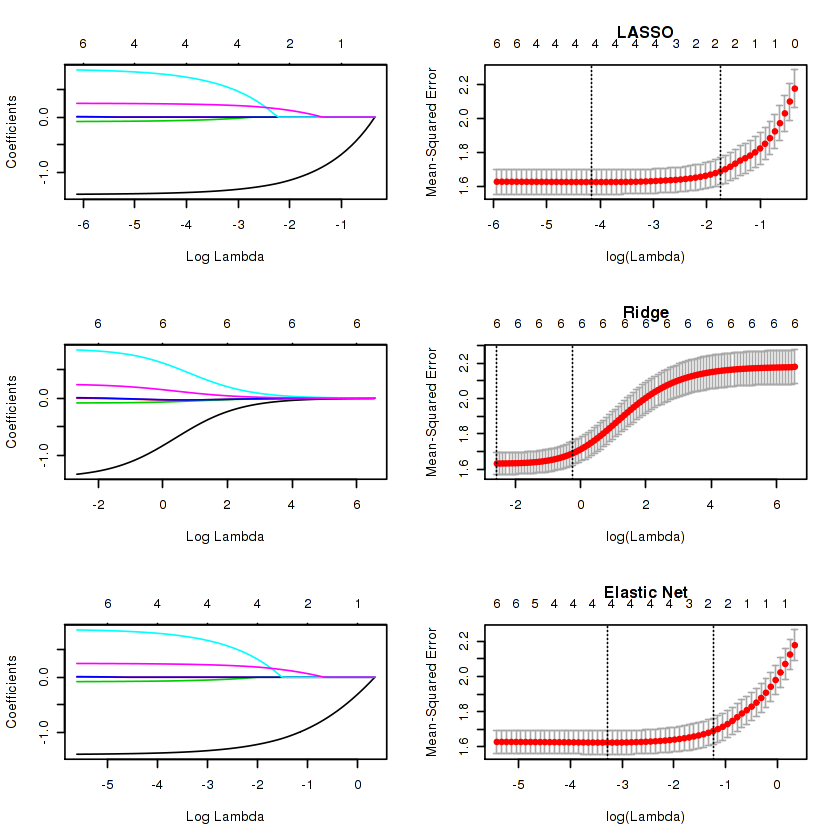

In [21]:
# Plot CV curves
par(mfrow=c(3,2))
plot(lasso, xvar="lambda")
plot(fit10, main="Lasso")

plot(ridge, xvar="lambda")
plot(fit0, main="Ridge")

plot(enet, xvar="lambda")
plot(fit5, main="Elastic Net")

In [32]:
suppressMessages(library(Metrics))

# Predict on test set
lasso_preds <- predict(lasso, x_test)
ridge_preds <- predict(ridge, x_test)
enet_preds <- predict(enet, x_test)

# Print RMSE values
paste("Lasso RMSE:", round(rmse(y_test, lasso_preds), 4))
paste("Ridge RMSE:", round(rmse(y_test, ridge_preds), 4))
paste("Elastic Net RMSE:", round(rmse(y_test, enet_preds), 4))

[1] "Lasso RMSE: 1.2367"

[1] "Ridge RMSE: 1.3408"

[1] "Elastic Net RMSE: 1.2409"

## Support Vector Machine (SVM)
Doc: https://cran.r-project.org/web/packages/e1071/e1071.pdf

#### may have to re-install e1071 package according to StackOverflow

In [44]:
library(e1071)

# Basic format and summary
svm_model <- svm(TARGET ~ ., data=df)
summary(svm_model)

ERROR: Error in svm.default(x, y, scale = scale, ..., na.action = na.action): object 'R_svmtrain' not found


In [ ]:
# Tune model parameters with grid-search
svm_tune <- tune(svm_model, TARGET ~ ., data=df,
                 ranges=list(
                   cost=10^(-1:2), 
                   epsilon = seq(0,0.2,0.01)
                 ))

In [ ]:
# Making predictions
svm <- svm(x_train, y_train)
svm_preds <- predict(svm, x_test)
paste("SVM RMSE:", round(rmse(y_test, svm_preds), 4))

## Decision Tree Model
Doc: https://cran.r-project.org/web/packages/rpart/rpart.pdf

Talk about decision tree algorithm

In [60]:
library(rpart)

# Fit regression tree to data
cntrl <- rpart.control(maxdepth = 10)
dtree <- rpart(TARGET ~ ., data=df, method="anova", control = cntrl)
summary(dtree)

Call:
rpart(formula = TARGET ~ ., data = df, method = "anova", control = cntrl)
  n= 1339 

          CP nsplit rel error    xerror       xstd
1 0.23097930      0 1.0000000 1.0012569 0.04501171
2 0.06746930      1 0.7690207 0.7711566 0.03625107
3 0.01755805      2 0.7015514 0.7079762 0.03261436
4 0.01000000      3 0.6839933 0.6976774 0.03272194

Variable importance
   ATTORNEY NORM_CLMAGE      CLMSEX 
         69          27           4 

Node number 1: 1339 observations,    complexity param=0.2309793
  mean=0.5519552, MSE=2.155151 
  left son=2 (655 obs) right son=3 (684 obs)
  Primary splits:
      ATTORNEY    < 1.5      to the right, improve=0.230979300, (0 missing)
      NORM_CLMAGE < -1.18739 to the left,  improve=0.070969290, (0 missing)
      MARITAL     < 1.5      to the right, improve=0.017497220, (0 missing)
      SEATBELT    < 1.5      to the left,  improve=0.012211220, (0 missing)
      CLMINSUR    < 1.5      to the right, improve=0.001072072, (0 missing)
  Surrogate splits

In [49]:
# Print tree structure
print(dtree)

n= 1339 

node), split, n, deviance, yval
      * denotes terminal node

1) root 1339 2885.74800  0.55195520  
  2) ATTORNEY>=1.5 655 1190.55600 -0.16904070  
    4) NORM_CLMAGE< -1.18739 53   71.77796 -1.10640200 *
    5) NORM_CLMAGE>=-1.18739 602 1068.11000 -0.08651556 *
  3) ATTORNEY< 1.5 684 1028.64300  1.24238300  
    6) NORM_CLMAGE< -1.18739 68  146.93390 -0.36341240 *
    7) NORM_CLMAGE>=-1.18739 616  687.01000  1.41964600 *


In [68]:
# Uncomment lines below to plot tree structure
# plot(dtree)
# text(dtree)

# Uncomment lines below to plot root node error
# par(mfrow=c(2, 1))
# rsq.rpart(dtree)

## Sources
